In [1]:
for (pkg in c("ggplot2", "dplyr", "patchwork", "ggplotify")) {
    suppressPackageStartupMessages(
        suppressWarnings(
            library(
                pkg,
                character.only = TRUE,
                quietly = TRUE,
                warn.conflicts = FALSE
            )
        )
    )
}

In [9]:
performances_file_path <- file.path("..", "results", "model_performances.parquet")
df <- arrow::read_parquet(performances_file_path)
df$feature <- gsub("all_terminal_features", "All features", df$feature)
df$feature <- gsub("Terminal_Cytoplasm_Intensity_IntegratedIntensity_AnnexinV", "Integrated Intensity of AnnexinV", df$feature)
df$shuffled <- factor(df$shuffled, levels = c("not_shuffled", "shuffled"))

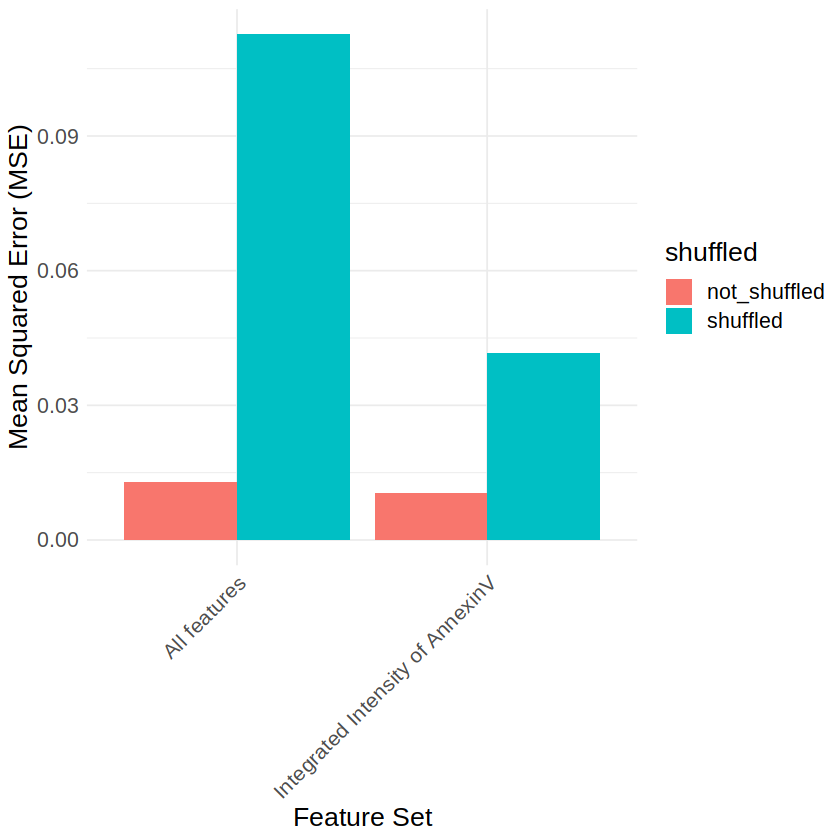

In [14]:
mse_plot <- (
    ggplot(df, aes(x = feature, y = mse, fill = shuffled))
    + geom_bar(stat = "identity", position = position_dodge()) 
    + theme_minimal() 
    + theme(
        axis.text.x = element_text(angle = 45, hjust = 1),
    ) 
    + labs(
        x = "Feature Set",
        y = "Mean Squared Error (MSE)"
    )
    + theme(text = element_text(size = 16))
)
save_path <- file.path("..", "results", "mse_plot.png")
ggsave(save_path, plot = mse_plot, width = 8, height = 6, dpi = 300)
mse_plot

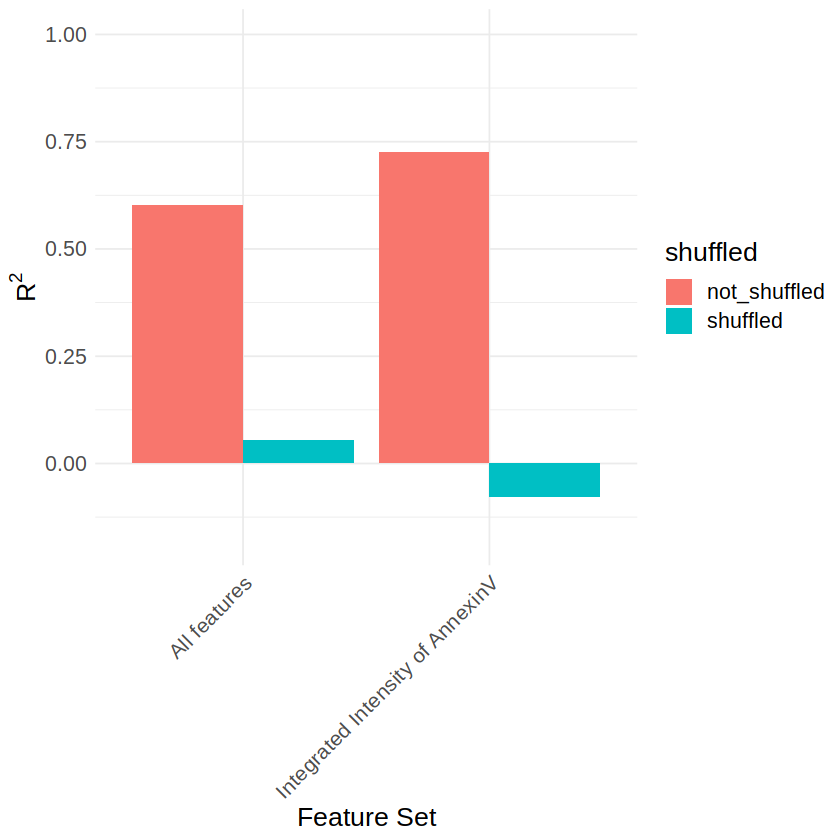

In [16]:
r2_plot <- (
    ggplot(df, aes(x = feature, y = r2, fill = shuffled))
    + geom_bar(stat = "identity", position = position_dodge()) 
    + theme_minimal() 
    + theme(
        axis.text.x = element_text(angle = 45, hjust = 1),
    ) 
    + labs(
        x = "Feature Set",
        y = expression(R^2)
    )
    + ylim(min(df$r2) - 0.1, 1)
    + theme(text = element_text(size = 16))
)
save_path <- file.path("..", "results", "r2_plot.png")
ggsave(save_path, plot = r2_plot, width = 8, height = 6, dpi = 300)
r2_plot